# 1. Importar los datos y explorarlos

In [2]:
import pandas as pd

df = pd.read_csv('csv/bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Preprocesamiento de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Valores únicos en cada columna
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [5]:
# Clases balanceadas
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [6]:
# Cómo podemos ver, las clases no están balanceadas. Vamos a hacer resampling
from sklearn.utils import resample

df_majority = df[df['is_canceled'] == 0]
df_minority = df[df['is_canceled'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=75166, random_state=42)
"""
df_minority es la clase minoritaria, por lo que vamos a hacer un resampling de esta clase para que tenga el mismo número de muestras que la clase mayoritaria.
replace=True indica que vamos a hacer un resampling con reemplazo.
n_samples=75166 indica el número de muestras que queremos obtener.
random_state=42 indica que queremos que el resampling sea reproducible.
"""

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['is_canceled'].value_counts()

is_canceled
0    75166
1    75166
Name: count, dtype: int64

In [7]:
df.shape, df_upsampled.shape

((119390, 32), (150332, 32))

In [8]:
# Columnas que no vamos a utilizar
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


In [9]:
# Valores nulos
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Eliminamos la columna 'company' porque tiene muchos valores nulos
df = df.drop(['company'], axis=1)
# Rellenamos los valores nulos de 'children' con la media
df.fillna({'children': df['children'].mean()}, inplace=True)
# Rellenamos los valores nulos de 'country' con el valor más frecuente
df.fillna({'country': df['country'].mode()[0]}, inplace=True)
# Rellenamos los valores nulos de 'agent' con el valor más frecuente
df.fillna({'agent': df['agent'].mode()[0]}, inplace=True)

In [11]:
# Categorical columns y numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

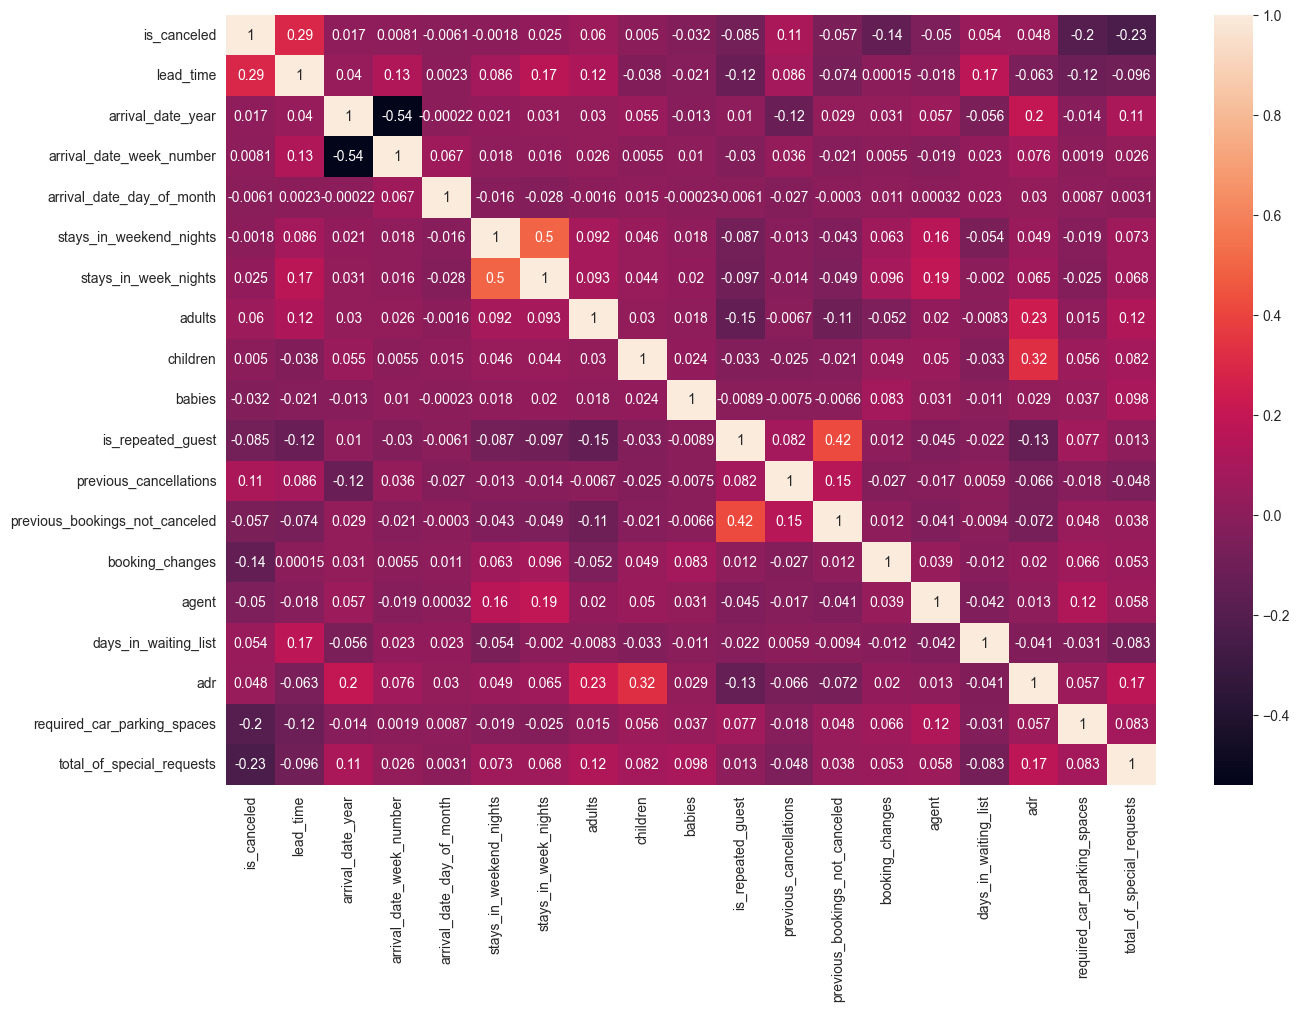

In [12]:
# Correlación de las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.show()

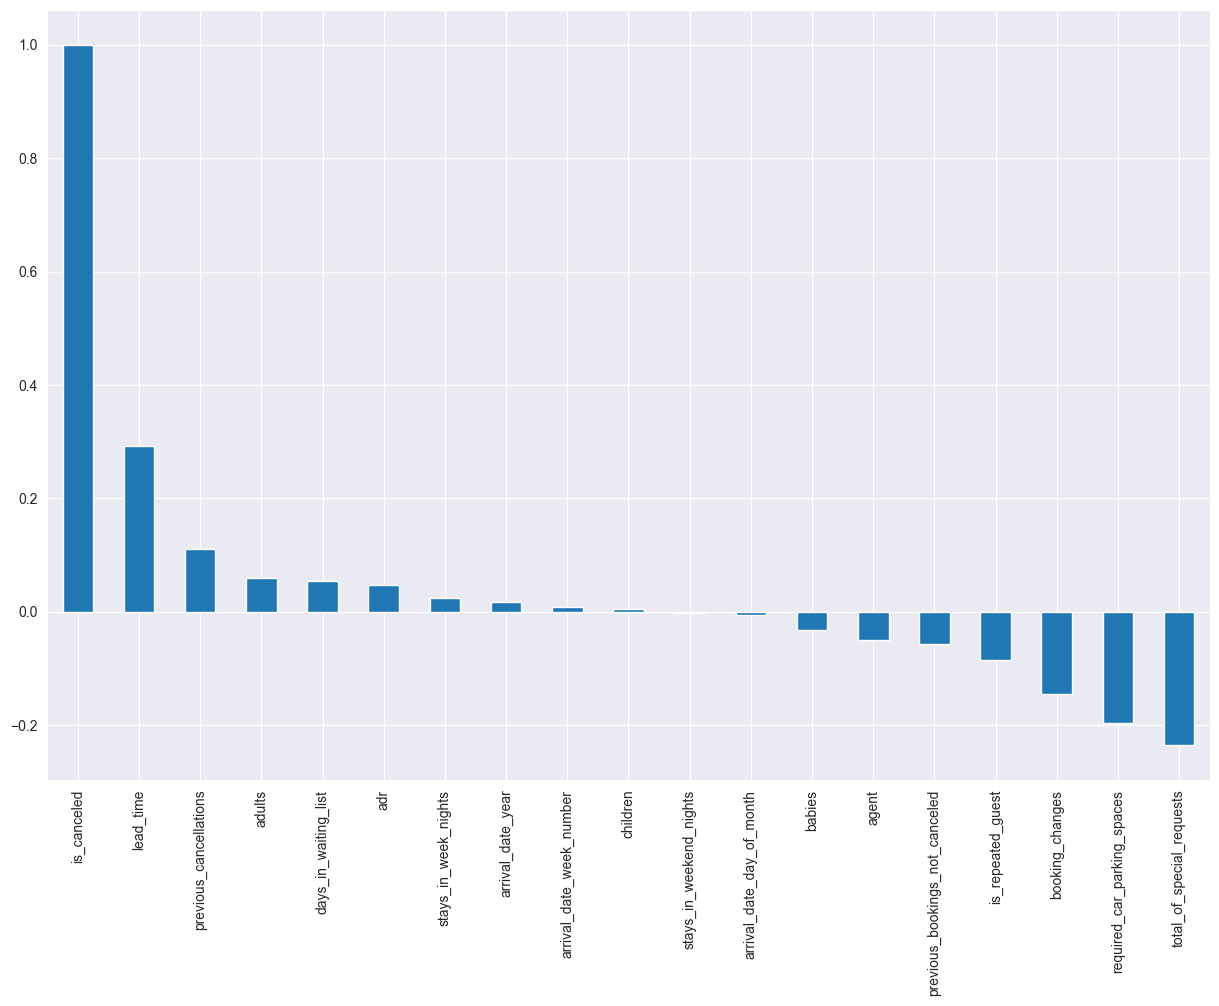

In [13]:
# Ver las correlaciones de las variables numéricas con la variable objetivo
df_numerical = df[numerical_columns]
plt.figure(figsize=(15, 10))
df_numerical.corr()['is_canceled'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [14]:
# Eliminamos las columnas que tienen una correlación baja con la variable objetivo
df = df.drop(['arrival_date_year', 'arrival_date_week_number', 'children', 'stays_in_weekend_nights', 'arrival_date_day_of_month'], axis=1)

In [15]:
# Transformamos las columnas categóricas OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder()
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_columns]).toarray())
OH_cols.index = df.index

In [16]:
# Eliminamos las columnas categóricas
df = df.drop(categorical_columns, axis=1)
# Concatenamos las columnas categóricas transformadas
df = pd.concat([df, OH_cols], axis=1)
df.head()

,is_canceled,lead_time,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,228,229,230,231,232,233,234,235,236,237
0,0,342,0,2,0,0,0,0,3,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,737,0,2,0,0,0,0,4,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,7,1,1,0,0,0,0,0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,13,1,1,0,0,0,0,0,304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,14,2,2,0,0,0,0,0,240.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 3. Entrenar el modelo

In [17]:
# Dividimos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['is_canceled'], axis=1), df['is_canceled'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83573, 251), (35817, 251), (83573,), (35817,))

In [18]:
# Mostrar la forma de los datos
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [251]


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear el callback de early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # Cualquier cambio menor a 0.001 se considera como no mejora
    patience=20, # El modelo se detiene si no mejora en 20 epochs
    restore_best_weights=True, # Restaurar los mejores pesos
)

In [20]:
# Creamos las capas de la red neuronal
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])

In [21]:
# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='mae',
)

Epoch 1/200

327/327 [==============================] - 11s 31ms/step - loss: 0.9063 - val_loss: 0.3599
Epoch 2/200
327/327 [==============================] - 10s 32ms/step - loss: 0.3169 - val_loss: 0.2647
Epoch 3/200
327/327 [==============================] - 10s 30ms/step - loss: 0.2587 - val_loss: 0.2173
Epoch 4/200
327/327 [==============================] - 10s 31ms/step - loss: 0.2328 - val_loss: 0.2065
Epoch 5/200
327/327 [==============================] - 9s 29ms/step - loss: 0.2185 - val_loss: 0.1926
Epoch 6/200
327/327 [==============================] - 9s 28ms/step - loss: 0.2104 - val_loss: 0.1879
Epoch 7/200
327/327 [==============================] - 11s 32ms/step - loss: 0.2039 - val_loss: 0.1979
Epoch 8/200
327/327 [==============================] - 10s 32ms/step - loss: 0.1978 - val_loss: 0.1762
Epoch 9/200
327/327 [==============================] - 11s 35ms/step - loss: 0.1973 - val_loss: 0.1724
Epoch 10/200
327/327 [==============================] - 12s 36ms/step - lo

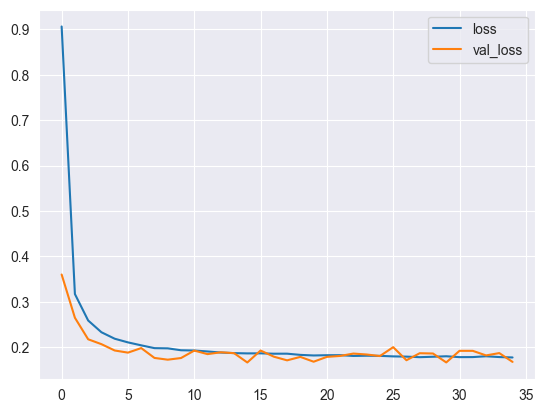

In [22]:
# Ajustamos el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1,
)

# Mostramos el historial del entrenamiento
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

1120/1120 [==============================] - 3s 2ms/step


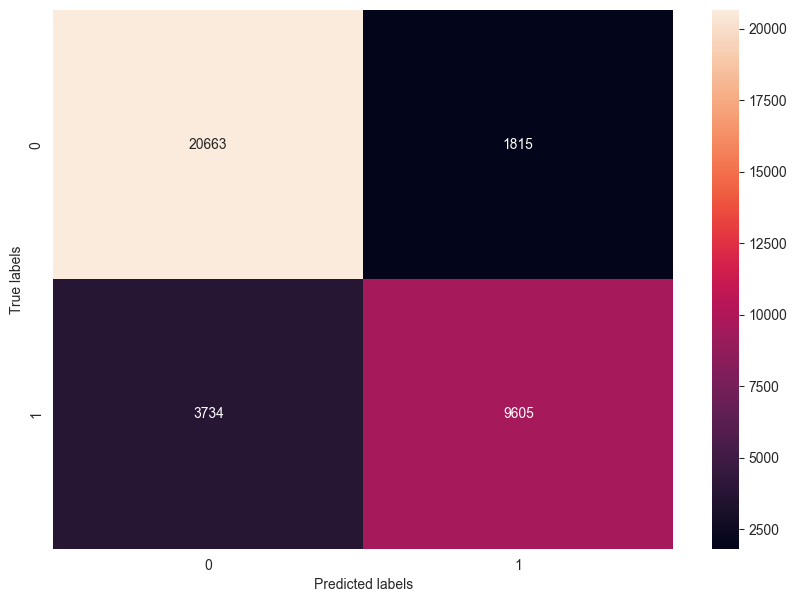

In [24]:
# Evaluamos el modelo con la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test) > 0.5)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()